In [ ]:
#

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np 


NOTEBOOK_DIR = Path.cwd()
CONTENT_DIR = Path.home()/'Datasets'/'unpackAI'/'DL201-4.0'
DATA_DIR = NOTEBOOK_DIR.parent/'data'

# Change this for use in colab

# Section 1: Tabular Data
<hr style="border:4px solid gray"> </hr>

In [4]:
print(DATA_DIR)

/home/jentlejames/Projects/unpackAI/Course_Development/DL201-4.0/data


### Decide what you want

**Adjust the ends to the means**

As we learned in DL101, beginning an AI project does not require you to be a huge tech company or have huge ammounts of well labeled data.

**Getting started is the most important step**

Don't waste time looking for the perfect dataset. FastAI Author and AI practitioner Jeremy Howard suggests "The most important concideration is data availability. "

**Adjust the ends to the means**

Don't waste months or years finding the perfect dataset or perfect project. If you find that data is not readily available for your project, find something that is tangentially related to your field of interest and go from there.

By starting a project and spending a reasonable ammount of time on each step, then you'll get a much better feel for the terrain you are coming up against. 


**Rapid Prototyping with End to End iteration** 

Rather than perfecting a masterpeice, try to first create a proof of concept or a prototype. 
Then, once you have your proof of concept, you can decide how you are going to improve it in the next iteration of development. If you have a proof of concept, it will do a lot of the talking for you when showing it to people. 

Prototyping

Feedback

Improvement

source: https://devsquad.com/blog/what-is-rapid-prototyping-and-why-is-it-used-in-development/

## Step 1: Choosing a Dataset
<hr style="border:2px solid gray"> </hr>

**Public Datasets**

Kaggle

Google

Online Interest Groups 


**Private, self collected Datasets**

You don't need to spend months or years building data pipelines, see what you have, and how it can be adapted to a proof of concept in order to create feedback that will show you how to improve your data collection. 




### Criteria and Considerations
<hr style="border:1px solid gray"> </hr>

Sources:
* https://analyticsindiamag.com/tutorial-get-started-with-exploratory-data-analysis-and-data-preprocessing/
* https://www.springboard.com/blog/data-science/data-science-capstone-project-annotated/


### Sample Size
<hr style="border:1px solid gray"> </hr>

While it is a misconception that you will need Gbs of data to do deep learning, you still do need to have enough samples or instances for your data contain enough information.

In tabular data, if you have less than 50 samples, it's going to be hard for a normal distribution to form as prominently as the algorithms depend on. While you still can get results, the margin of error will be higher than if you have hundreds or thousands of samples to draw from.|

In [32]:
df = pd.read_excel(CONTENT_DIR/'bank_loan'/'Bank_Personal_Loan_Modelling.xlsx',
                           sheet_name=1,
                           header='infer')

In [33]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0)

In [34]:


#checking the number of features in the Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, len(training_set.columns))
print("\nTest Set : \n",'-' * 20,len(test_set.columns))




Number of features in the datasets :
 ########################################

Training Set : 
 -------------------- 14

Test Set : 
 -------------------- 14


### Number of Features
<hr style="border:1px solid gray"> </hr>

In [35]:
#checking the features in the Datasets
print("\n\nFeatures in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, list(training_set.columns))
print("\nTest Set : \n",'-' * 20,list(test_set.columns))



Features in the datasets :
 ########################################

Training Set : 
 -------------------- ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

Test Set : 
 -------------------- ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


### Cleanliness of Data
<hr style="border:1px solid gray"> </hr>

When first looking at a dataset, a huge consideration should be how much work it going to require to clean it up. There are plenty of tricks to do this, but we need to have an idea of what we are getting into before proceeding

#### Identifying the Data Types
<hr style="border:1px solid gray"> </hr>

This part is going to tell you a lot about the quality of the data. If you see that everything is an obj datatype, then it means that you will most likely need to change them to something more suitable for analysis. 

In [36]:
#checking the data types of features

#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", training_set.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",test_set.dtypes)



Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Test Set : 
 -------------------- 
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard    

Luckily, it looks like all of this dataset is already cleaned up as number types for us. 

#### Identifying the Features
<hr style="border:1px solid gray"> </hr>

This next step is to take a look at the features in the dataset, and see which ones are relevant to you because they contain information that has predicting power. Doing this at the beginning is a good thing to do before investing time into exploring it.


In [37]:
training_set.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [38]:
training_set.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2913,2914,39,12,75,94501,3,2.333333,2,0,0,0,0,1,1
3275,3276,32,8,65,95134,1,1.200000,1,268,0,0,0,1,0
775,776,65,39,23,92835,3,0.700000,2,0,0,0,0,0,1
217,218,39,14,74,94305,3,3.000000,1,0,0,0,0,0,0
1245,1246,46,21,41,94025,1,1.400000,3,128,0,0,0,1,0


If you find a column which you believe is particularly important you can check it manually with these features.

In [39]:
training_set['Education'].describe()

count    4000.000000
mean        1.874750
std         0.835905
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

In [40]:
training_set['Education'].unique()

array([2, 1, 3])

In [41]:
training_set['Education'].value_counts()

1    1679
3    1178
2    1143
Name: Education, dtype: int64

Since the "Education" column contains only three numbers, we should try to enquire further into what this means. What do you think that these three numbers mean? Why are there more instances of 1 than of 3? Does that distribution say something about the data? 

## Step 2: Loading Tabular Data
<hr style="border:2px solid gray"> </hr>

Goal: To open the files 

### Using the iPython Shell 

Here are some commonly used commands

!pwd (This means print working directory) It tells us where we are inside of the computer's file system

In [5]:
!pwd

/home/jentlejames/Projects/unpackAI/Course_Development/DL201-4.0/Week-1


! tells the shell we are doing something for only one command

!mkdir 'file_path' (make directory, this command can create a new file within the command)

In [6]:
!mkdir 'test_directory'

mkdir: cannot create directory ‘test_directory’: File exists



%cd 'file_path' changes the directory or folder which we are working inside of. The default is the home directory.

The % character makes the option persistant rather than just running for one command

notice how the % operator changes. It means that this will be persistant

In [7]:
%cd test_directory

/home/jentlejames/Projects/unpackAI/Course_Development/DL201-4.0/Week-1/test_directory


!wget 'url ' (Downloads a file from a url on the internet into the current directory)

In [8]:
#!wget 'url'

!mv 'original_location' 'new_location' (moves a file, can also be used to rename a file)

In [9]:
#!mv 'file'

It is a good idea to create a project folder where you can store everything in one place

Then this project folder's file path becomes a configuration variable called the project root or base directory. This is useful when deploying your project

In [10]:
# If you need ro remove a file
# you can do so  with this 
%cd '..' # exits test directory
!rm -r 'test_directory' #removes test

[Errno 2] No such file or directory: '.. # exits test directory'
/home/jentlejames/Projects/unpackAI/Course_Development/DL201-4.0/Week-1/test_directory
rm: cannot remove 'test_directory': No such file or directory


### Example 1: CSV data
<hr style="border:1px solid gray"> </hr>

The most common file type for tabular data will be a csv file. CSV means comma seperated values. 

the CSV format is strong in structured data that could be described in an Excel Spreadsheet. 

This tutorial will go over some of the key problems one might come across.

We'll talk about setting the encoding for different languages.

We'll go over what a header is, 
and how we can give some additional instructions to pandas

#### i. pd.read_csv 

Pandas has execellent functionality for csv files.

The method: ".read_csv" can handle almost all of the initial setup without passing any commands or arguements.

However, it is important to understand the following concepts

1. Seperator / Delimiter: How the file is broken up into value

2. Header: The column names

3. Encoding: Simply put, what language the file is written in e.g. English, Chinese

If we can pass these arguements to Pandas, it resolves a lot of the ambiguitites. If you end up needing more, you can check the pandas documentation here. 

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [11]:
#hskVocab = pd.read_csv('./HSK Official With Definitions 2012 L3 freqorder.txt')
hskVocabPath = DATA_DIR/'ChineseVocabulary/HSK Official With Definitions 2012 L3 freqorder.txt'


#### Header


Here, we have a messy file, which is a list of Chinese Vocabulary.

This is a good example to use because most things are quite unclear, so we have to tell pandas the following bits of information



In [12]:
#pd.read_csv(hskVocabPath)

In [13]:
import pandas as pd
#%cd PROJECT_ROOT
hskVocab = pd.read_csv(hskVocabPath)
print(hskVocab.shape)

(299, 12)


What is the red flag from this output? 

Before we even open the file, does it appear that the number of 
rows and columns is correct? 

Think for a moment, then run the following cell. 

In [14]:
#hskVocab.head()

Try running this code and find the problem with the output. 

Remember, that we are expecting 300 vocabulary words at the HSK3 level.

What is the shape of our new data?

What do the columns look like?

In [15]:
hskVocab = pd.read_csv(str(hskVocabPath),
                       header = None,
                      )
print(hskVocab.shape)

(300, 12)


This looks slightly better. We now have our expected 300 rows.
However, there is still something wrong with the number of columns.

The problem in this case, turns out to be the seperator

#### tsv files (Seperators and Delimiters)

In [16]:
hskVocab.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,啊\t啊\ta1,a2,a3,a4,a5\tā,á,ǎ,à,a\tah; (particle showing elation,doubt,puzzled surprise,or approval)
1,还\t還\thai2,huan2\thái,huán\tstill; yet; in addition; even | repay; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, there are way too many columns.

In computers, the forward slash '\' is very significant.

Whenever you see at \t or \n it is an instruction to the computer.

So, \t does not belong, which means that it is our seperator



In [17]:
hskVocab = pd.read_csv(hskVocabPath,
                       header = None,
                       sep='\t'
                      )
print(hskVocab.shape)

(300, 5)


This looks much better. Now, that we have the correct shape that we were expecting, we can now proceed

Now, let's look at the shape of our data. Is it what we are expecting now?

What about the columns? Is the output what you expected, or is more managable?

You can rename columns in example 1 (include reference link)

#### Language Encoding 

Chinese language encoding utf-8 or gb2312

In [69]:
# As for encoding, you cah handle it in each column individually using this
# Pandas method

hskVocab.Simplified = hskVocab.Simplified.str.translate('gb2312')

### Example 2: JSON data and APIs
<hr style="border:1px solid gray"> </hr>

While CSV files are most common for collections of data in the past, oftentimes JSON files are used in data streams from the web, specifically APIs. 

If you get this, you may have to make changes to the JSON file structure in order for it to work. This is called flattening. Flattening is where you take a JSON's structure which is heiracchical and make it so that it can go into a table.

Pandas has a feature to load data directly from an API using the following functionality

In [2]:
import pandas as pd
import json

#pd.read_json()

In [10]:
url = "https://api.exchangerate-api.com/v4/latest/CNY"

# Parsing JSON from URL:

# Handling nested JSON:

#df = json_normalize(resp.json())

df.head()
df = pd.read_json(url)
df.head()




,provider,WARNING_UPGRADE_TO_V6,terms,base,date,time_last_updated,rates
AED,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,CNY,2022-02-04,1643932802,0.578
AFN,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,CNY,2022-02-04,1643932802,15.660
ALL,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,CNY,2022-02-04,1643932802,16.890
AMD,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,CNY,2022-02-04,1643932802,75.660
ANG,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,CNY,2022-02-04,1643932802,0.282


How to normalize the json

In [9]:
import requests
from pandas.io.json import json_normalize

url = ""
resp = requests.get(url=url)

# Handling nested JSON:
df = json_normalize(resp.json())
df.head()

### Example 3: Microsoft Excel
<hr style="border:1px solid gray"> </hr>

Microsoft word documents can be imported into pandas with minimal difficulty. 

In this, you may have to set the header just like you would for a csv file. 

However, it is important to note a few key differences.

One is that excel files have have more than one sheet.

This can be specified with the variable **sheet_name**=

In [2]:
bank_loans = pd.read_excel(CONTENT_DIR/'bank_loan'/'Bank_Personal_Loan_Modelling.xlsx',
                           header='infer')

In [3]:
bank_loans.shape

(20, 3)

As you can see, the first time around, we don't get a shape anywhere near what we would expect. Let's find out what happened, and specify the sheet name

In [4]:
bank_loans = pd.read_excel(CONTENT_DIR/'bank_loan'/'Bank_Personal_Loan_Modelling.xlsx',
                           sheet_name=1,
                           header='infer')

In [5]:
bank_loans.shape

(5000, 14)

Now that we have a shape that is much better than before, let's take a look at the 
rows and columns


In [6]:
bank_loans.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


It looks like for id, we can use that as the index column, so let's load the table one more time

In [7]:
index_column = 'ID'
bank_loans = pd.read_excel(CONTENT_DIR/'bank_loan'/'Bank_Personal_Loan_Modelling.xlsx',
                           sheet_name=1,
                           header='infer',
                           index_col=index_column
                          )
bank_loans.shape

(5000, 13)

In [8]:
bank_loans.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Now the data is looking much better. 

In review, you may have to specify the 

Sheet_name
index column or index_col
as well as the header 


## Step 3: Exploring Tabular Data 
<hr style="border:2px solid gray"> </hr>

When performing EDA on tabular data, it is a good idea to get summary staticstics as soon as possible. To do this, you may have some basic tasks to perform such as 

1. Rename columns

From time to time, you may want to clean up the names of your columns. After all, it is the way that we will be accessing your data. We wouldn't want to leave typos and extra spaces in the column names because it will follow us down the rest of our project.

Once you know what your columns are,  this give you a better idea  of what your features are. From here you can decide what is a categorical variable and what is a continious variable. 


2. Check for empty/null values and decide what to do with them

In a dataset, there are often empty and null values. These need to be taken care of because it will severely affect our model's accuracy to have NaN values since NaN means Not a number. You can't do mathematical operations on something that is not a number.  

It is up  to you to decide what to do with  them depending on the situation. In this we will go over some common ways to handle them. 

3. changing the type from text to a number

Often, pandas data will read numbers as text, or more specifically a python object. A python object serves are a container in this case. Anything can fit inside of this container and python won't complain about it the way a lower level language would. However, if we want to  do exploratory statistics, we will need to clean up these columns.

The dataset that we will be using for this section is a dataset about startups and the investments that they recieved. This is a good example to use because it has plenty of features to experiment on. It also needs to be cleaned up before using it as well. This dataset will stay with us during the course so it is a good idea to get familiar with it.

Here is a link to it:
https://www.kaggle.com/arindam235/startup-investments-crunchbase

In addition to this, we will be using a set of Chinese vocabulary words. This table was chosen, because of the challenge it presents. It does not tell us what the seperator is, it has no column names, and the columns are also in Chinese and may present encoding problems. As a result, if we can open this file, then we can deal with loading almost any csv file.

In [ ]:
startups_df = pd.read_csv(DATA_DIR/'StartUpInvestments'/'investments_VC.csv',
           encoding='unicode-escape')


### Example 1: Renaming Columns
<hr style="border:1px solid gray"> </hr>

Often, you will need to rename columns in Pandas Dataframes.

Since, this will serve as an index, it is tightly coupled with all the operations you can do on it.

As a result, creating a clear, legible index is a good first step.

As for the naming convention, it is useful to use names that are clear and descriptive. You can always autocomplete the names using the tab feature in most IDEs and Jupyter notebooks

But, first things first, a Pandas Dataframe column does not behave as one would expect as Python List to behave. 

Can rename the columns like this?

Try this code below.

In [19]:
#hskVocab.columns[0] = 'Simplified'


Error Message Translation:

Do not change the index name, unless you absolutely mean to do so

Mutable means able to be changed. So, the columns are immutable.

Because the index is so important in Pandas, it does not allow you to swap out one columns name as you please, and for a very good reason.


Imagine, if a city changed the name of it's streets all the time, it would be difficult to get around, or use a map that is slightly outdated. Addresses on a street would change, and delivering mail would become more difficult. 

{{Picture of mail}} 

In short, much of your code will depend on the name you give the column, because it allows you to find where your data is. 

Your code will break if you are always changing the name of columns.



Therefore, Pandas forces you to be very intentional about the name of the column. 

So this is how you can change the names of the columns 

In programming Jargon, this kind of data is called a tuple. 
This is used in place of lists, when other parts of a program depend

In [20]:
# Create a python list
hskVocabColumns = ['Simplified','Traditional','Pinyin_Numbers','Pinyin_Accented','Definition']

hskVocab.columns = hskVocabColumns

In [21]:
# Now this is looking a lot better 
hskVocab.head(5)

# However, we should give the columns names for greater clarity


,Simplified,Traditional,Pinyin_Numbers,Pinyin_Accented,Definition
0,啊,啊,"a1, a2, a3, a4, a5","ā, á, ǎ, à, a","ah; (particle showing elation, doubt, puzzled ..."
1,还,還,"hai2, huan2","hái, huán",still; yet; in addition; even | repay; to return
2,把,把,"ba3, ba4","bǎ, bà",(mw for things with handles); (pretransitive p...
3,过,過,guo4,guò,to pass; to cross; go over; (indicates a past ...
4,如果,如果,ru2guo3,rúguǒ,if; in the event that


In [22]:
# if you wish to change just one you can do this 

# 
hskVocabColumns = list(hskVocab.columns)
print(hskVocabColumns[3])

Pinyin_Accented


In [23]:
hskVocabColumns[3] = 'Pinyin_Accented'

In [24]:
hskVocab.columns = hskVocabColumns

### Skill 2: Deleting Duplicates, Dropping Rows
<hr style="border:1px solid gray"> </hr>

Deleting Duplicate rows:

This is a simple step to take when processing data. Duplicates are not a good thing to have in a tabular dataset because it can cause the model to overemphasize the patterns found in the duplicates, along with other reasons. It only takes one line of code to do it with a Pandas Dataframe. 

In [31]:
startups_df = pd.read_csv(DATA_DIR/'StartUpInvestments'/'investments_VC.csv',
           encoding='unicode-escape')

In [33]:
startups_df = startups_df.drop_duplicates()



The above command will look for the obvious duplicates. 

We can also be more precise using more arguements covered in the appendix.

Another option is to drop based on conditions. In this dataframe, the name is a very important piece of information. If the name is empty in the dataframe, it is a strong indication that the data contained in this is invalid and should be dropped.


In [ ]:
#Removing the row with no 'name'

startups_df.dropna(how='any', subset=['name'], axis=0, inplace=True)

Another common task to handle is to get rid of uncessary columns. The permalink and url columns, while they might allow us to do some feature engineering or have access to their website, don't have any predictive power. It is not a good idea to include these in the model.

In [42]:
#cleaning the dataframe by dropping uneccessary columns
startups_df = startups_df.drop(['permalink', 'homepage_url'], axis=1)

### Skill 3: Handling Missing Values
<hr style="border:1px solid gray"> </hr>

Now, something that needs to be kept in mind is that a lot of datasets will have missing values. For this there are various tools that can be used.

The reason that missing values are a problem are many.

The first is that is if a sample contains many missing values, it is a sign that the sample may be incomplete or at worst contaminate the quality of our dataset.

However, null values are a fact of life, and can mean different things about how the data was collected. A lot can be done to lcean this up.

The reason that we should clean these up is because many Machine Learning models assume that the data we are using is noramlly distributed. 

In [61]:
startups_df = pd.read_csv(DATA_DIR/'StartUpInvestments'/'investments_VC.csv',
           encoding='unicode-escape')

# This removes whitespace in the columns 
startups_df.columns = [col.strip() for col in list(startups_df.columns)]

The intuitive examples:

* Zero Fill

Missing values can mean different things based on the context. A missing value in column listing amounts of money, one came most likelt assume that a null value means zero.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [43]:
startups_df.fillna(0).tail()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49433,Zzish,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,0,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,ZZNode Science and Technology,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,0,Beijing,Beijing,1.0,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,Zzzzapp Wireless ltd.,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,0,Split,Split,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,[a]list games,|Games|,Games,"93,00,000",operating,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,[x+1],|Enterprise Software|,Enterprise Software,"4,50,00,000",operating,USA,NY,New York City,New York,4.0,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


* Dropping Values

We can also drop data with too many missing values. This data can be dropped. This is an option when it appears like the data is of very low quality.

This next example is of customer data from Starbucks. A significant number of the samples in this dataset have empty values in several columns. In this case both the age and gender columns are empty in the same samples. This is a clear example of when it is a good idea to drop these instances because of the low data quality in them.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [24]:
!pip install kaggle -qq
!pip install imptu


In [45]:
%cd 'Course_Development/DL201-4.0/Week-1/starbucks-customer-data/'

[Errno 2] No such file or directory: 'Course_Development/DL201-4.0/Week-1/starbucks-customer-data/'
/home/jentlejames/Projects/unpackAI/Course_Development/DL201-4.0/Week-1/test_directory


In [25]:
!kaggle datasets download ihormuliar/starbucks-customer-data

 95%|████████████████████████████████████  | 7.00M/7.38M [00:02<00:00, 4.30MB/s]
100%|██████████████████████████████████████| 7.38M/7.38M [00:02<00:00, 2.81MB/s]


In [34]:
#!mkdir 'starbucks-customer-data'
#!mv starbucks-customer-data.zip starbucks-customer-data/starbucks-customer-data.zip
#%cd 
!unzip starbucks-customer-data/starbucks-customer-data.zip
#%cd ..

unzip:  cannot find or open starbucks-customer-data/starbucks-customer-data.zip, starbucks-customer-data/starbucks-customer-data.zip.zip or starbucks-customer-data/starbucks-customer-data.zip.ZIP.


In [48]:
profile = pd.read_csv(NOTEBOOK_DIR/'starbucks-customer-data/profile.csv',index_col=0)

In [49]:
portfolio = pd.read_csv(NOTEBOOK_DIR/'starbucks-customer-data/portfolio.csv',index_col=0)

In [50]:
profile.shape
#Always check the shape

(17000, 5)

In [51]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


Checking the shape is something to always keep aware of.

We also have some interesting information here, because our gender and income columns both have the exact same number of missing values. In a dataset of 17,000 samples, it is hard for this to be a coincidence.

In [52]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Let's confirm this by indexing these rows. and taking a look.
This follows the index -> broadcast format, except that it includes a conditional statement to include multiple columns. This is good practice for later

In [120]:
profile[(profile['gender'].isnull() & profile['income'].isnull())] #& (profile['income'] == np.nan) ]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


we can also see that the age is 118, which shows an inaccuracy on this part of the data. 

So, now we can safely remove these columns 

In [54]:
profile = profile.dropna(how='any')

Now, all of the null values have been removed. We can confirm this by running this command again.

In [55]:
profile.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

### Skill 4: Formating numbers
<hr style="border:1px solid gray"> </hr>

Another common tasks you may come across is to have to reformat strings into integers. 

Oftentimes, data will come in a human readable format. It is much easier to read 1,000,000 with commas than 1000000 without. Pandas makes it easy to handle these problems. 

Often, you can rely on the compiler to find these formatting problems for you. The error message will show you whatever data point has something that contains something other than an integer.

The pandas .str module does this quite well with the method .replace 

It is very convenient and very fast compared to using a loop

In [ ]:
startups_df.funding_total_usd=startups_df.funding_total_usd.str.replace(",",'')


In [ ]:
startups_df.funding_total_usd=startups_df.funding_total_usd.str.replace(' ',"")

In [ ]:
startups_df.funding_total_usd=startups_df.funding_total_usd.replace("-",np.nan)



In [ ]:
startups_df.funding_total_usd=startups_df.funding_total_usd.astype('float',errors='ignore')

### Skill 5: Datetime Data
<hr style="border:1px solid gray"> </hr>

Datetime data can be converted using the pd.to_datetime method

This takes a regular expression with the following codes.

Below are the most common ones that you will come across. If you have more specific tasks, you can refer to the following website for a cheat sheet.

https://strftime.org/

Pandas Datetime cheatsheet

days: Code	Example	Description

* %d	08	Day of the month as a zero-padded decimal number.
* %-d	8	Day of the month as a decimal number. (Platform specific)

months: Code	Example	Description


* %b	Sep	Month as locale’s abbreviated name.
* %B	September	Month as locale’s full name.
* %m	09	Month as a zero-padded decimal number.
* %-m	9	Month as a decimal number. (Platform specific)

Years: Code	Example	Description


* %y	13	Year without century as a zero-padded decimal number.
* %Y	2013	Year with century as a decimal number.


if your string has a % in it: Code	Example	Description

* %%	%	A literal '%' character.

<hr style="border:1px solid gray"> </hr>


Here, we can input the format codes that were used.

in this case, it's pretty simple. with a year, month, and date.

Sometimes you may have to include seperators like a / into your expression

In [135]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'].astype(str), 
                                             format='%Y%m%d')

Later on in the course, we will discuss other methods for handling missing data which involve preprocessing and transformation 

### Example 3: Obtaining Summary Statistics
<hr style="border:1px solid gray"> </hr>

Pandas offers many ways to get summary statistics of your data. 

Here are some one liners:

In [ ]:
#!pip install sweetviz as sv
import sweetviz as sv

my_report = sv.analyze(startups_df)

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Image("../input/sweetviz/sweetviz.JPG")

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

For continious variables we can use the concept of standard deviation to make  sense of the data.

The following boxplot is useful for this . 


#### Box Plots



<AxesSubplot:xlabel='age'>

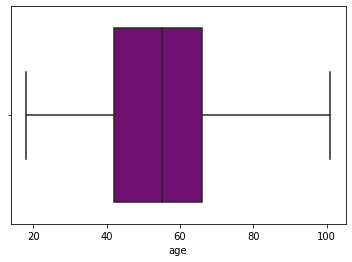

In [130]:
sns.boxplot(data=profile, x='age',color='purple')


<AxesSubplot:xlabel='income'>

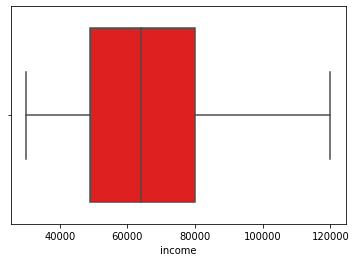

#### Histograms

plt.hist()

<AxesSubplot:xlabel='age', ylabel='Count'>

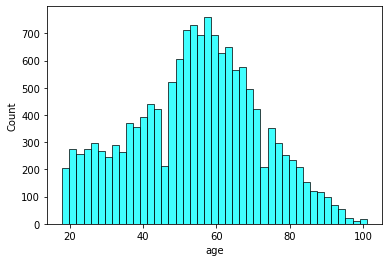

In [161]:
sns.histplot(profile['age'],color = 'cyan')

The goal of these plots is to visual parts of the data in order to identify what some important features will be in order to proceed to the next step of preprocessing the data

## AutoML

In [102]:
from pycaret.classification import *

In [103]:
startups_df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

The target variable here is going to vary depending on what you would like to do. 

In this case, let's try to see if we can find anything that can predict if a startup will recieve round_C funding

In [122]:
startups_df['target'] = startups_df['round_C'] > 0

startups_df.drop(['founded_quarter'],axis=1 ,inplace=True)

In [123]:
data = startups_df.sample(frac=0.90, random_state=42)
data_unseen = startups_df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (44493, 36)
Unseen Data For Predictions: (4944, 36)


In [124]:
from pycaret.classification import *

In [ ]:
setup(data, target='target',session_id=123, fix_imbalance=True,feature_selection=True,remove_multicollinearity=True,)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:59:52
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
name,Categorical
category_list,Categorical
market,Categorical
funding_total_usd,Numeric
status,Categorical
country_code,Categorical
state_code,Categorical
region,Categorical
city,Categorical
funding_rounds,Numeric


In [ ]:
best_model = compare_models()

credit to: ishadss for analysis of this notebook. Feel free to check out his profile for more. 

https://www.kaggle.com/ishadss/coffee-starbucks-customer-clusters-and-eda

# Appendix

### Deleting duplicates by column

In [34]:
startups_df = pd.read_csv(DATA_DIR/'StartUpInvestments'/'investments_VC.csv',
           encoding='unicode-escape')

If you would like to specify which columns you would like to duplcate on, you can use the subset 
option.

There is a lot more in the pandas documentation

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [37]:
startups_df = startups_df.drop_duplicates(subset=['name','homepage_url'])

### Data Imputation 

### Using Python Tools for missing values (Inputation)

Python can give us an edge by allowing us to leverage open source libraries that use algorithms to fill the data. These methods can have their advantages in cases where these simple one line of code approaches aren't sophsticated enough 

In [ ]:
#!pip install impyute


# Starting fresh again
startups_df = pd.read_csv(DATA_DIR/'StartUpInvestments'/'investments_VC.csv',
           encoding='unicode-escape')
# This removes whitespace in the columns 
startups_df.columns = [col.strip() for col in list(startups_df.columns)]
startups_df = startups_df.drop_duplicates()
startups_df.drop(['permalink','homepage_url'],axis=1,inplace=True)
startups_df.dropna(how='any', subset=['name'], axis=0, inplace=True)
st

from impyute.imputation.cs import mice 

